In [1]:
using LinearAlgebra
using DelimitedFiles
using IterTools
using TimerOutputs
using Printf

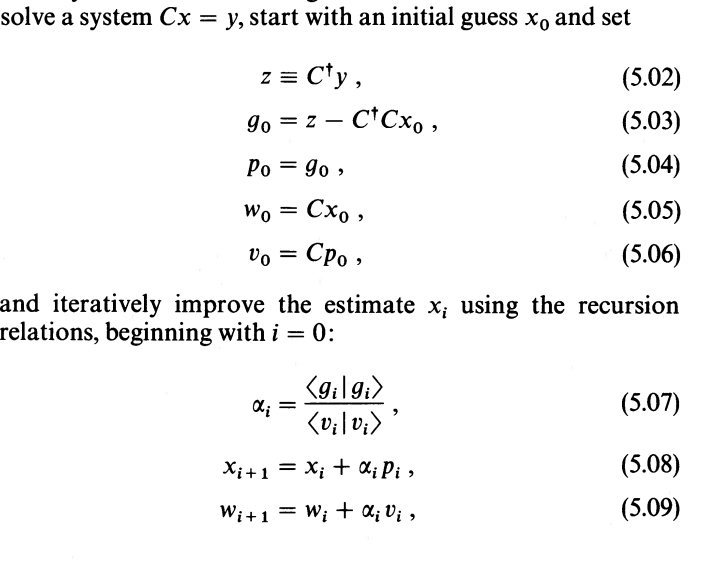
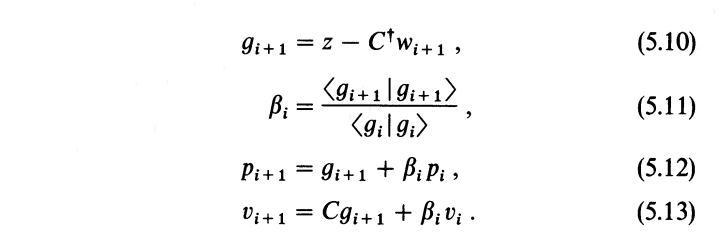


In [37]:
δ(i,j) = ==(i,j)

function ConjugatedGradientsSolver(A,y,x0,error)
    #This function solves the system Ax = y
    
    z = conj(A)*y
    
    g = z - conj(A)*A *x0
    p = g
    w = A*x0
    v = A*p
    
    x=x0
    
    i = 0
    while norm(p) > error
        i+=1
        
        alpha = dot(g,g)/dot(v,v)
        x += alpha * p
        
        if i%10!=0
            w += alpha * v
        else
            w = A*x
        end
        
        ng = dot(g,g)
        g = z - conj(A)*w
        beta = dot(g,g)/ng
        
    
        p = g + beta*p
        if i%10!=0
            v = A*g + beta*v
        else
            v = A*p
        end
        
    end
    x
end


function ConjugatesGradsSolverDDA_NoMemory(Rs,d,Einc,knorm,er,error)
    e = er[0] + im*er[1]
    N_r = size(Rs)[1]
    
    α = 3*d^3/(4* π) * (ϵ_r -1)/(ϵ_r +2)
    
    
    function F(j,k,l,m)
        R = Rs[j] - Rs[k]
        r = norm(R)
        return(1/r * (==(l,m) - R[l]*R[m]/r^2))
    end
    
    function G(j,k,l,m)
        R = Rs[j] - Rs[k]
        r = norm(R)
        return 1/r^3 * (==(l,m) - 3*R[l]*R[m]/r^2) 
    end
    
    x .= Einc
    z = zeros(Complex,3*N_r)
    g = Similar(z)
    p = Similar(z)
    w = Similar(z)
    v = Similar(z)
    
    function Amult(v)
        a = similar(v)
        for j in 1:N_r
            for k in 1:N_r
                R = Rs[j] - Rs[k]
                r = norm(R)
                for l in 1:3
                    for m in 1:3
                        F = (1/r * (==(l,m) - R[l]*R[m]/r^2))
                        G = (1/r^3 * (==(l,m) - 3*R[l]*R[m]/r^2) )
                        H = r*G
                        a[3*j + l] = δ(j,k)*δ(l,m)*α^(-1) + exp(im*knorm*r) * (-knorm^2 *F + G -im*k*H) * v[3*i+m]
                    end
                end
            end
        end
    a
    end
    
                        
            
        
    function cAmult(v)
        a = similar(v)
        for j in 1:N_r
            for k in 1:N_r
                R = Rs[j] - Rs[k]
                r = norm(R)
                for l in 1:3
                    for m in 1:3
                        F = (1/r * (==(l,m) - R[l]*R[m]/r^2))
                        G = (1/r^3 * (==(l,m) - 3*R[l]*R[m]/r^2) )
                        H = r*G
                        a[3*j + l] = δ(j,k)*δ(l,m)*α^(-1) + exp(-im*knorm*r) * (-knorm^2 *F + G +im*k*H) * v[3*i+m]
                    end
                end
            end
        end
    a
    end
    
    z = cAmult(b)
    g = z - cAmult(Amult(Einc))
    p = g
    w = Amult(x0)
    v = Amult(p)
    
    x = Einc
    
    
    
    
end

ConjugatesGradsSolverDDA_NoMemory (generic function with 1 method)

In [6]:
A = Array{Float64}(undef,3,3)
A[1,:] = [1,2,3]
A[2,:] = [4,-1,0]
A[3,:] = [2,-2,1]

A = Symmetric(A)

b = [1;-3;0]

display(A)

println(A\b)

ConjugatedGradientsSolver(A,b,[0;0;0],0.001)

3×3 Symmetric{Float64, Matrix{Float64}}:
 1.0   2.0  3.0
 2.0  -1.0  0.0
 3.0   0.0  1.0

[1.25, 5.5, -3.75]
[-0.5221238938053098, 0.5221238938053098, 0.31327433628318585]
[-0.4507679648930335, 0.6223258365331872, 0.2933351618211739]
[1.2500000000000027, 5.500000000000005, -3.7500000000000053]


3-element Vector{Float64}:
  1.2500000000000027
  5.500000000000005
 -3.7500000000000053

In [24]:
 function PosicoesPlaca(N,Lx,Ly,Lz)
        #N é densidade dipolar linear

        N_x = floor(Int,Lx * (N))
        N_y = floor(Int,Ly * (N))
        N_z = floor(Int,Lz * (N))

        N_dips = (N_x)*(N_y)*(N_z)

        Rs = Array{Float64}(undef,N_dips,3)

        x,y,z = 0:(N_x-1),0:(N_y-1),0:(N_z-1)
        R = product(x,y,z)

        #print(size(R))

        j = 0
        for i in R
            j+=1
            Rs[j,:] .= i 
        end

        TextoRs = "Pos.txt"
        println(TextoRs)
        writedlm(TextoRs, Rs./N .+ 1/(2N) )

        Rs ./ N .+ 1/(2N) , 1/N
    end
    
    #######################################


    function MatrizA(Posicoes, k_vec, ϵ_r, d)

        N_dips = size(Posicoes)[1]
        k = norm(k_vec)

        N_M = 3 * N_dips
        α = 3/(4 * π)*d^3 * (ϵ_r - 1)/(ϵ_r + 2)
        A = zeros(Complex,N_M,N_M)

        for i in 1:(N_dips-1), j in (i+1):N_dips

            r_vec = Posicoes[i,:] - Posicoes[j,:]
            r = norm(r_vec)

            for l in 1:3, m in 1:3
                B = k^2 * (r_vec[l] * r_vec[m] - r^2 * δ(l,m) ) 
                C = 1/r^2 - im* k/r 
                D = r^2 * δ(l,m) - 3*r_vec[l] * r_vec[m]
                A[3*(i-1) + l, 3*(j-1) + m ] = exp(im * k * r)/r^3 * (B + C*D)
            end

        end

        for i in 1:N_M
            A[i,i] = 1/α
        end

        A_f = Symmetric(A)
        A_f
    end


function Incident_field(Posicoes,k_vec,E_0)    
        N_dips = size(Posicoes)[1]
        N_M = 3 * N_dips
        E_inc = Array{Complex}(undef,N_M)
        println(E_0)
        for i in 1:N_dips
            r_vec = Posicoes[i,:]
            E_inc[(i*3 - 2) : i*3 ] .= E_0 * exp(im*dot(r_vec,k_vec)) 
        end

        TextoE =  "EInc.txt"
        writedlm(TextoE,E_inc)

        E_inc
    end

Rs,d = PosicoesPlaca(10,1,1,1)
A = MatrizA(Rs,0,-3,d)

Einc = Incident_field(Rs,[0,0,0],[1,0,0])




Sol = ConjugatedGradientsSolver(A,Einc,Einc,0.001)


Pos.txt
[1, 0, 0]


3000-element Vector{ComplexF64}:
    0.2305736394941364 + 0.0im
    0.2275616921950063 + 0.0im
   0.22756169219469052 + 0.0im
   0.06533208864068296 + 0.0im
  -0.06540578886960641 + 0.0im
  -0.06540578886967911 + 0.0im
  -0.07481492551121575 + 0.0im
  -0.13387442927811513 + 0.0im
  -0.13387442927811063 + 0.0im
   -0.0854731807490395 + 0.0im
 -0.051663606721467206 + 0.0im
  -0.05166360672161398 + 0.0im
  -0.09026153418744226 + 0.0im
                       ⋮
  -0.08547318074893603 + 0.0im
  -0.05166360672124015 + 0.0im
  -0.05166360672104922 + 0.0im
   -0.0748149255104887 + 0.0im
  -0.13387442927748508 + 0.0im
  -0.13387442927739082 + 0.0im
    0.0653320886411741 + 0.0im
  -0.06540578886960288 + 0.0im
  -0.06540578886959712 + 0.0im
    0.2305736394932667 + 0.0im
   0.22756169219362685 + 0.0im
   0.22756169219345768 + 0.0im

In [26]:
display(A*Sol)

3000-element Vector{Complex}:
      0.9999999973812281 + 0.0im
    3.692046744718791e-9 + 0.0im
   2.0204762475453143e-9 + 0.0im
      0.9999999961302316 + 0.0im
   1.2122040038420323e-9 + 0.0im
    1.316302155815463e-9 + 0.0im
      0.9999999959624754 + 0.0im
  -6.177842126753319e-10 + 0.0im
  -9.034636493793213e-10 + 0.0im
       1.000000001163609 + 0.0im
  -2.6763698895981847e-9 + 0.0im
   -3.388222070965785e-9 + 0.0im
      1.0000000040633161 + 0.0im
                         ⋮
      0.9999999981744878 + 0.0im
  -1.3739960280645391e-9 + 0.0im
  -6.811635699932594e-10 + 0.0im
      0.9999999966813533 + 0.0im
   7.006306645962468e-10 + 0.0im
   1.6966126281658944e-9 + 0.0im
      0.9999999982270538 + 0.0im
   -3.80026676793932e-10 + 0.0im
 -3.8633629628748167e-10 + 0.0im
      0.9999999950017582 + 0.0im
 -1.4588863450626377e-10 + 0.0im
  -3.969944373238832e-10 + 0.0im

In [28]:
==(1,0) + 3

3

In [29]:
a = zeros(Complex,15)

15-element Vector{Complex}:
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im
 0 + 0im

In [32]:
Rs,d = PosicoesPlaca(5,1,1,1)
Rs

Pos.txt


125×3 Matrix{Float64}:
 0.1  0.1  0.1
 0.3  0.1  0.1
 0.5  0.1  0.1
 0.7  0.1  0.1
 0.9  0.1  0.1
 0.1  0.3  0.1
 0.3  0.3  0.1
 0.5  0.3  0.1
 0.7  0.3  0.1
 0.9  0.3  0.1
 0.1  0.5  0.1
 0.3  0.5  0.1
 0.5  0.5  0.1
 ⋮         
 0.7  0.5  0.9
 0.9  0.5  0.9
 0.1  0.7  0.9
 0.3  0.7  0.9
 0.5  0.7  0.9
 0.7  0.7  0.9
 0.9  0.7  0.9
 0.1  0.9  0.9
 0.3  0.9  0.9
 0.5  0.9  0.9
 0.7  0.9  0.9
 0.9  0.9  0.9